In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("C:\\Users\\admin\\Desktop\\Loyalist\\ML\\Titanic_data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1> EDA </h1>

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1.Cabin feature as more number of missing values (687).<br>
2.Embarked feature can be easily filled as it as only 2 missing values.<br>
3.The Age feature, which has 177 missing values

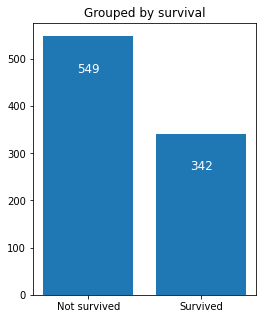

In [7]:
survived_count = titanic.groupby('Survived')['Survived'].count()
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='White',
             horizontalalignment='center', verticalalignment='center')
plt.show()

There are 549 people who were are not survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

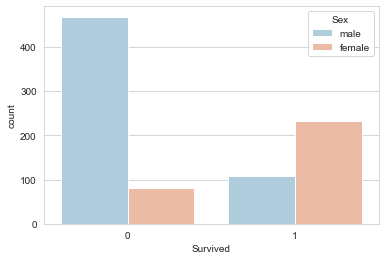

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic, palette='RdBu_r')

We can see that the females survival count is more than the males.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

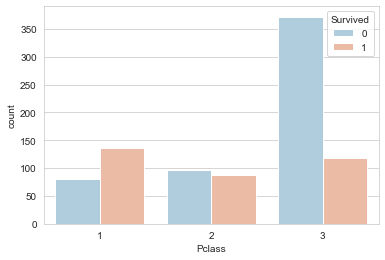

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Survived',data=titanic, palette='RdBu_r')

We can observe that there are more passengers in class 3 than in class 1 and class 2, but only about 110 passengers in class 3 survived. In class 2, the survival and non-survival counts are around 80 and 90, respectively, while in Class 1, there are roughly 140 passengers who survived. Class1 has a high priority for rescue.

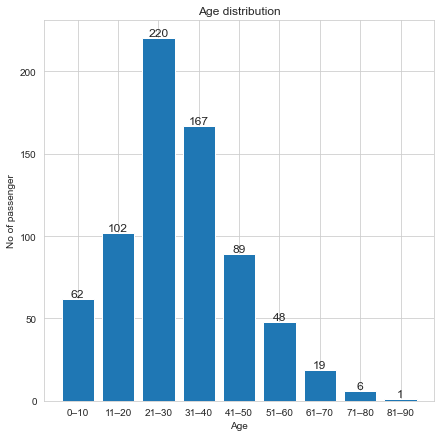

In [10]:
ages = titanic[titanic['Age'].notnull()]['Age'].values
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])
ages_hist_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

We can observe that the number of people between the ages of 21-30 is quite large.

<AxesSubplot:>

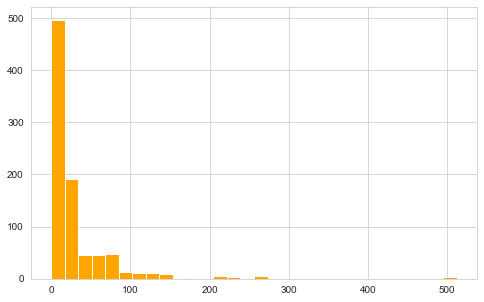

In [11]:
titanic['Fare'].hist(color = 'Orange', bins = 30 , figsize=(8,5))

<h1> Data Cleaning </h1>

<b> Age Column </b>
We fill the missing values with random values distributed with standard deviation and centred around the mean.

In [12]:
def fill_na_Age(titanic, colname):
    mean = titanic['Age'].mean()
    sd = titanic['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return titanic[colname].apply(fill_empty).astype(int)
titanic['Age'] = fill_na_Age(titanic, 'Age')

<b> Cabin Column </b> <br>
Let's make a new column called CabinYes that has a value of 1 if there is a cabin and a value of 0 if there isn't.


In [13]:
def create_Yes_cabin(titanic, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)):
            return 0
        return 1
        
    return titanic[colname].apply(_is_nan)
    
titanic['CabinYes'] = create_Yes_cabin(titanic, 'Cabin')

<b> Embarked </b> <br>
Fill the 2 missing values with most common value

In [14]:
Embarked_count = titanic.groupby('Embarked')['Embarked'].count()
Embarked_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [15]:
common_value = 'S'
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

<b> Converting Categorical features (Name,Sex,Embarked)

In [16]:
titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
def get_title(x):
    return x.split(',')[1].split('.')[0].strip()


In [18]:
titanic['Title'] = titanic['Name'].apply(get_title)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [19]:
Title = pd.get_dummies(titanic['Title'], prefix='Title')
titanic1 = pd.concat([titanic, Title], axis=1)

In [20]:
#Convert Sex column to numeric
Gender = {"male": 0, "female": 1}
data = [titanic1]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(Gender)

In [21]:
#Convert Embarked into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic1]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [22]:
titanic1.dtypes

PassengerId             int64
Survived                int64
Pclass                  int64
Name                   object
Sex                     int64
Age                     int32
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked                int64
CabinYes                int64
Title                  object
Title_Capt              uint8
Title_Col               uint8
Title_Don               uint8
Title_Dr                uint8
Title_Jonkheer          uint8
Title_Lady              uint8
Title_Major             uint8
Title_Master            uint8
Title_Miss              uint8
Title_Mlle              uint8
Title_Mme               uint8
Title_Mr                uint8
Title_Mrs               uint8
Title_Ms                uint8
Title_Rev               uint8
Title_Sir               uint8
Title_the Countess      uint8
dtype: object

In [23]:
titanic_df = titanic1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Title'], axis=1)

In [24]:


titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'CabinYes', 'Title_Capt', 'Title_Col', 'Title_Don',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_the Countess'],
      dtype='object')

<h1> Decision Tree </h1>

In [33]:
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
X = titanic_df.drop("Survived", axis=1)
Y = titanic_df["Survived"]


In [41]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [42]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=1)
clf


DecisionTreeClassifier(criterion='entropy', random_state=1)

In [43]:
clf = clf.fit(X_train, Y_train)

Y_predict = clf.predict(X_test)


In [44]:

#plt.figure(figsize=(30,18))
#tree.plot_tree(clf,fontsize=14)
#tree.plot_tree(clf)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})
df

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


In [45]:
from sklearn import metrics
print('precision score:', metrics.precision_score(Y_test,Y_predict, average='weighted'))
print('recall score:', metrics.recall_score(Y_test,Y_predict, average='weighted'))
print('accuracy score:', metrics.accuracy_score(Y_test, Y_predict))

precision score: 0.8265109717551488
recall score: 0.8268156424581006
accuracy score: 0.8268156424581006


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
titanic_cm = confusion_matrix(Y_test, Y_predict)
print(titanic_cm)


# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Y_test,Y_predict,labels=[1,0])
print('Classification report : \n',matrix)

[[90 15]
 [16 58]]
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.78      0.79        74
           0       0.85      0.86      0.85       105

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



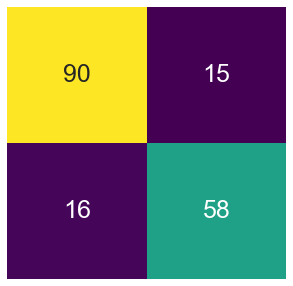

In [47]:
# convert the ndarray to a pandas dataframe
#cm_df = pd.DataFrame(titanic_cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sns.heatmap(titanic_cm, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()